# Studieschuld sneller afbetalen?

Met wat voorbeeld nummertjes: 24000 euro schuld, 120 per maand afbetalen (minimaal), bespaar (met 5% rente) je ruim **17.000** euro door niet 500 euro per maand te betalen!

In [1]:
import holoviews as hv
hv.notebook_extension()
%output size=200

In [2]:
# laten we wat aannames doen:
schuld = 24000
rente = 1.05
minimaal_aflos_bedrag = 120
maximaal_aflos_bedrag = 500

In [3]:
def bespaar_monies(schuld, rente, aflos_bedrag, verbose=False):
    bespaard = schuld
    rente_per_maand = rente**(1/12)
    i_maand = 0
    while schuld > 0:
        i_maand += 1
        schuld -= aflos_bedrag
        bespaard -= aflos_bedrag
        bespaard *= rente_per_maand
    if verbose:
        print(f'Je spaart {bespaard:.0f} euro door minimaal te betalen '
              f'in {i_maand} maanden met {aflos_bedrag} per maand')
    return bespaard, i_maand


bespaar_monies(schuld, rente, minimaal_aflos_bedrag, verbose=True)
bespaar_monies(schuld, rente, maximaal_aflos_bedrag, verbose=True);


Je spaart 17004 euro door minimaal te betalen in 200 maanden met 120 per maand
Je spaart 2616 euro door minimaal te betalen in 48 maanden met 500 per maand


In [4]:
def verschil(schuld, rente, min_max_aflos_bedrag):
    _min, _max = min_max_aflos_bedrag
    return abs(bespaar_monies(schuld, rente, _min, False)[0] -
               bespaar_monies(schuld, rente, _max, False)[0])

def plot_verschil(schuld, minimaal_aflos_bedrag, maximaal_aflos_bedrag):
    min_max = (minimaal_aflos_bedrag, maximaal_aflos_bedrag)
    diffs = {rente: verschil(schuld, 1 + rente/100, min_max) / 1000 for rente in range(1, 11)}
    return hv.Curve(diffs, kdims=['jaarlijkse rente (%)'], vdims=["duizend euro's bespaard (k€)"])

:Curve   [jaarlijkse rente (%)]   (duizend euro's bespaard (k€))
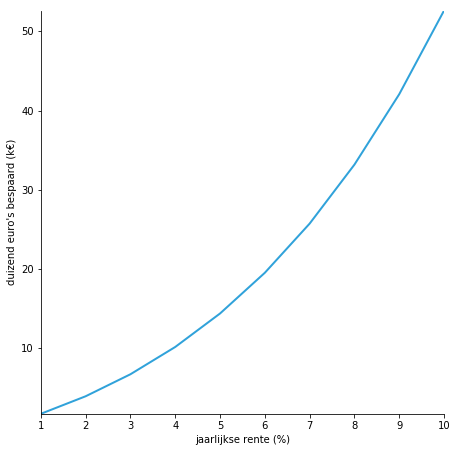

In [5]:
plot_verschil(schuld=24000, minimaal_aflos_bedrag=120, maximaal_aflos_bedrag=500)

# Dynamisch

:HoloMap   [schuld (€)]
   :Curve   [jaarlijkse rente (%)]   (duizend euro's bespaard (k€))
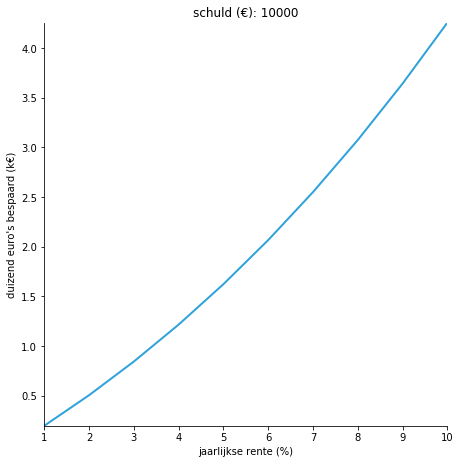
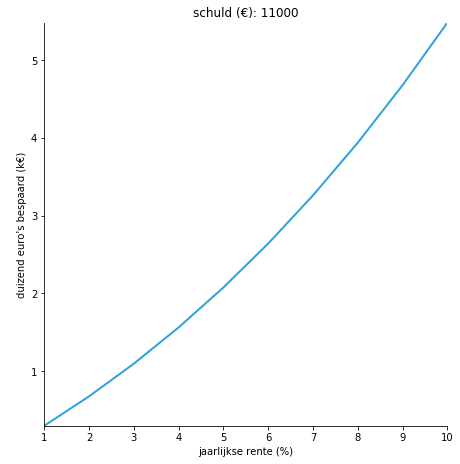
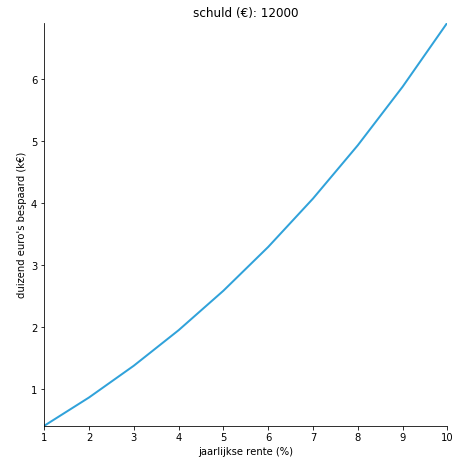
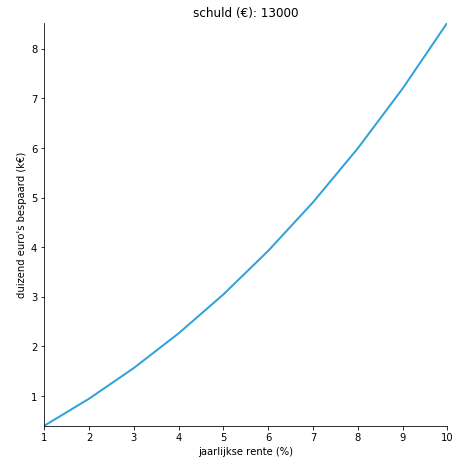
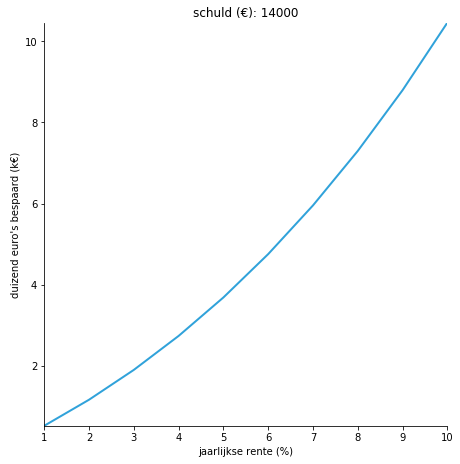
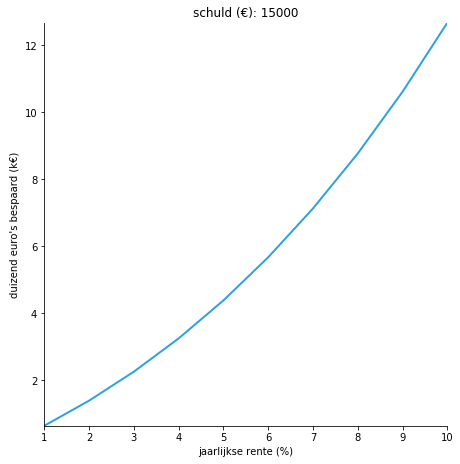
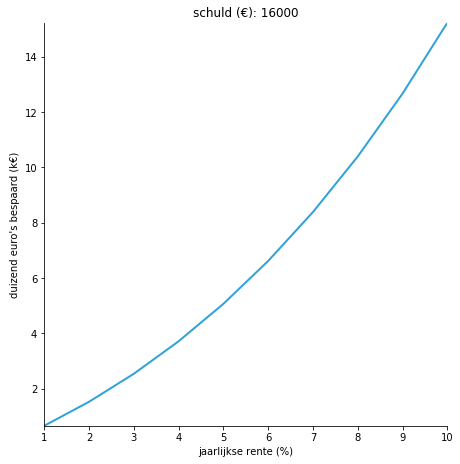
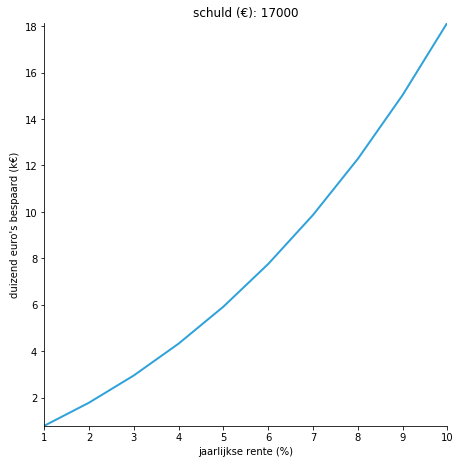
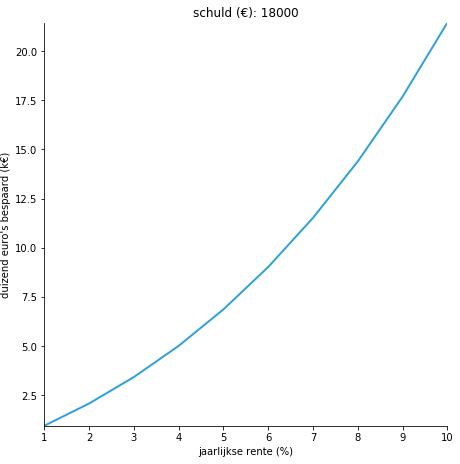
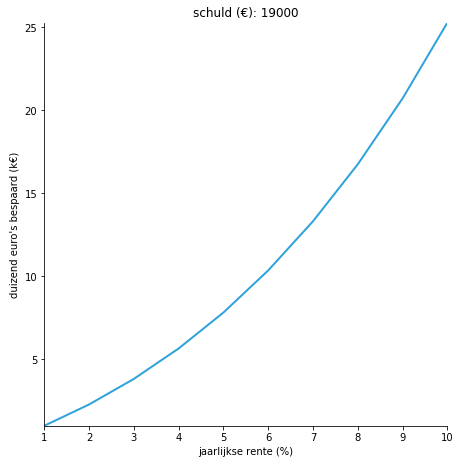
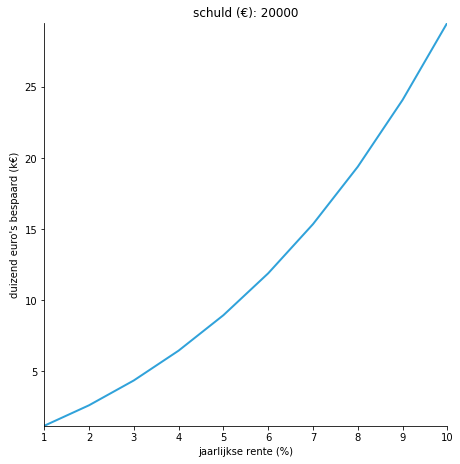
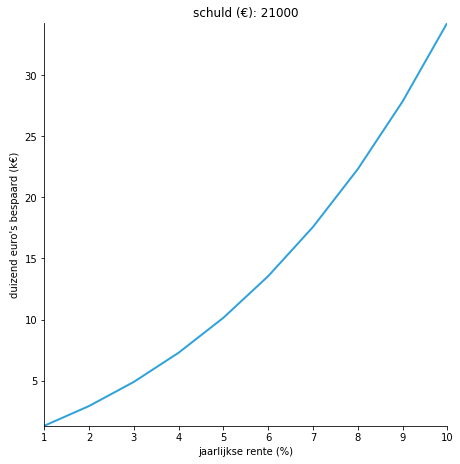
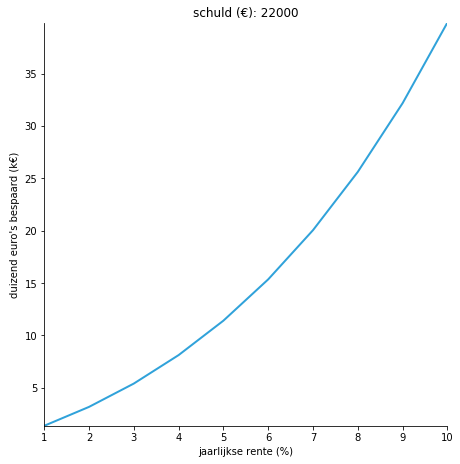
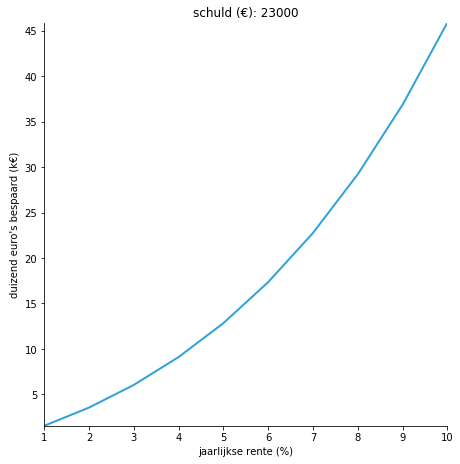
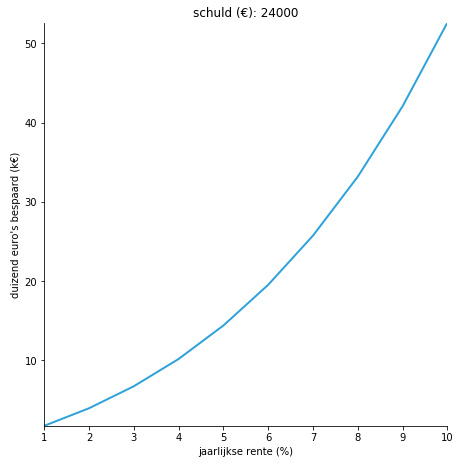
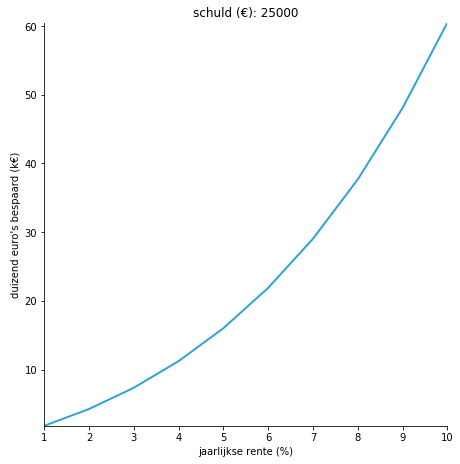
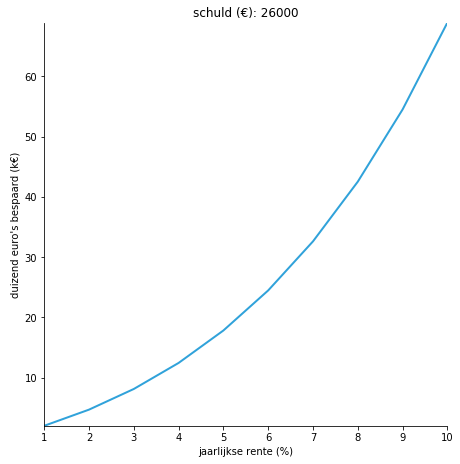
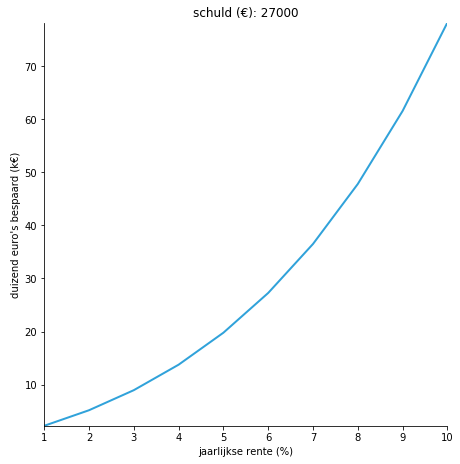
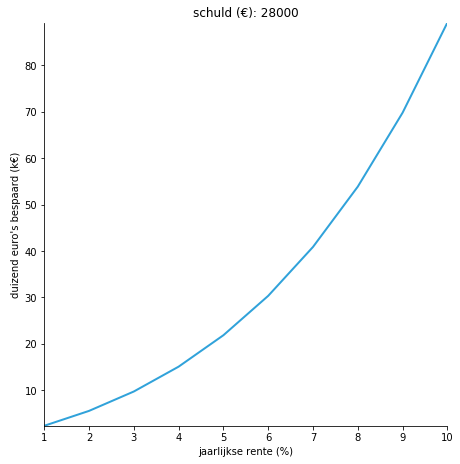
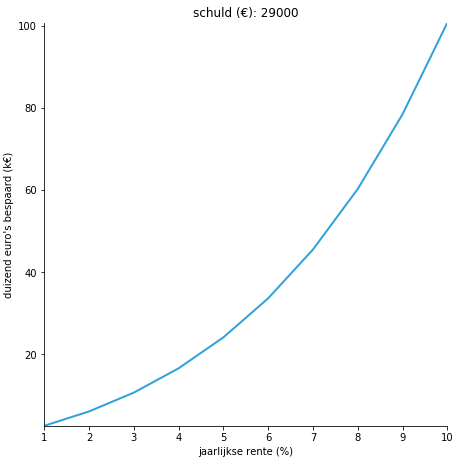

In [6]:
%%opts Curve {+framewise}
d = {schuld: plot_verschil(schuld, minimaal_aflos_bedrag=120, maximaal_aflos_bedrag=500)
     for schuld in range(10000, 30000, 1000)}
hv.HoloMap(d, kdims=['schuld (€)'])